In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.animation as animation
import matplotlib
from IPython.display import HTML
import plotly.graph_objects as go  #plotly 4.0.0rc1
from plotly.subplots import make_subplots
from matplotlib import pyplot
import plotly.figure_factory as ff
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import itertools

from importlib import reload

In [2]:
import matplotlib.cm as cm # matplotlib's color map library
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
samples0 = list(np.load('../samples_arm_0.npy'))
samples1 = np.load('../samples_arm_1.npy')
samples2 = np.load('../samples_arm_2.npy')


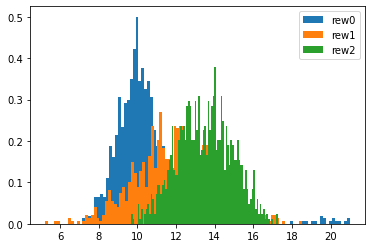

In [4]:
rew0 = list(np.load('../rew_arm_0.npy'))
rew1 = list(np.load('../rew_arm_1.npy'))
rew2 = list(np.load('../rew_arm_2.npy'))

fig = plt.hist(rew0,  density=True, alpha=1, bins=90, label='rew0')
fig = plt.hist(rew1,  density=True, alpha=1, bins=90, label='rew1')
fig = plt.hist(rew2,  density=True, alpha=1, bins=90, label='rew2')

plt.legend(loc='upper right')


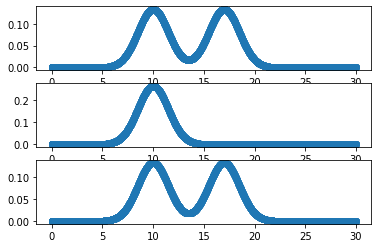

In [5]:
# Plot prior for each arm
ps0 = list(np.load('../ps_arm_0.npy'))
ps1 = list(np.load('../ps_arm_1.npy'))
ps2 = list(np.load('../ps_arm_2.npy'))

fig, axes = plt.subplots(3)

axes[0].scatter(samples0, ps0)
axes[1].scatter(samples1, ps1)
axes[2].scatter(samples2, ps2)

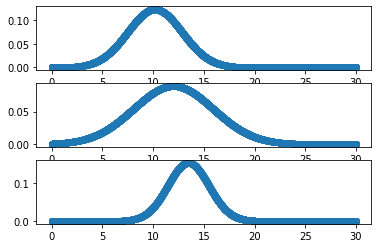

In [6]:
# Plot likelihood for each arm
pos0 = list(np.load('../pos_arm_0.npy'))
pos1 = list(np.load('../pos_arm_1.npy'))
pos2 = list(np.load('../pos_arm_2.npy'))

fig, axes = plt.subplots(3)

axes[0].scatter(samples0, pos0)
axes[1].scatter(samples1, pos1)
axes[2].scatter(samples2, pos2)

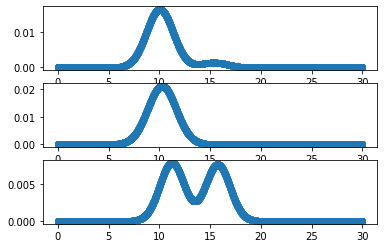

In [7]:
# Plot joint for each arm
pso0 = list(np.load('../pso_arm_0.npy'))
pso1 = list(np.load('../pso_arm_1.npy'))
pso2 = list(np.load('../pso_arm_2.npy'))

fig, axes = plt.subplots(3)

axes[0].scatter(samples0, pso0)
axes[1].scatter(samples1, pso1)
axes[2].scatter(samples2, pso2)


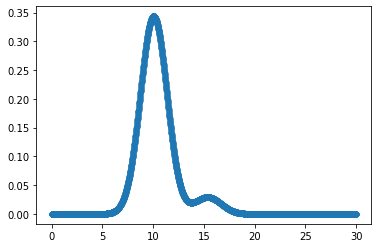

In [11]:
# Plot true posterior for arm 1
import scipy.stats as stats
import math

muinf = 16.27
varinf = 2

mu10 = 10.3
var10= 1.5

mu2 = 10.2
var2 = 1.8

mu1 = 10.1
var1 = 1.9

mu05 = 10.7
var05 = 4.2


mu0 = 9.7
var0 = 53

#pso2 = pso
mus = [muinf, mu10, mu2, mu1, mu05, mu0]
varss = [varinf, var10, var2, var1, var05, var0]

data = pd.DataFrame()


for it in range(len(mus)):
    x = np.random.randn(100000) * np.sqrt(varss[it]) + mus[it]
    data['col_'+str(it)] = x    #plt.plot(x, stats.norm.pdf(x, mus[it], sigma))

fig = plt.scatter(samples0, np.multiply(pso0, 1/0.0477), linewidths=0.00001)


array([5.7773271e-14, 6.1257463e-14, 6.4948067e-14, ..., 2.9650778e-29,
       2.7229228e-29, 2.5004105e-29], dtype=float32)

/home/francesco/.local/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 's'),
 Text(0, 0.5, '$q(s)$'),
 Text(0.5, 1.0, 'Variational approximation')]

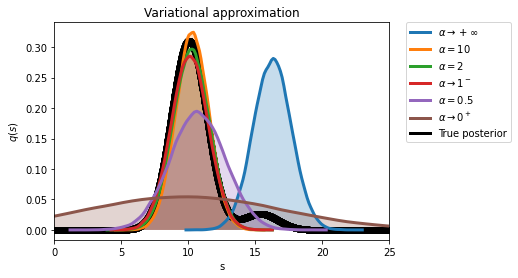

In [9]:
# Plot true posterior and variational posteriors for arm 1 and different alpha

labels = [r'$\alpha \rightarrow +\infty$',r'$\alpha = 10$', r'$\alpha = 2$', r'$\alpha \rightarrow 1^-$',
            r'$\alpha = 0.5$', r'$\alpha \rightarrow 0^+$']
f, ax = plt.subplots(1, 1, figsize=(6,4))

for it in range(len(mus)):
    sns.distplot(data['col_'+str(it)], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 3}, 
                      label = labels[it])
sns.distplot([1], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'True posterior', color='black')    
plt.scatter(samples0, np.multiply(pso0, 1/0.0528), color='black', label='s')

    
plt.legend([r'$\alpha \rightarrow +\infty$',r'$\alpha = 10$', r'$\alpha = 2$', r'$\alpha \rightarrow 1^-$',
            r'$\alpha = 0.5$', r'$\alpha \rightarrow 0^+$', 'True posterior'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlim([0,25])
ax.set(xlabel='s', ylabel=r'$q(s)$', title='Variational approximation')

#f.tight_layout(pad=1.0)
#f.savefig(base_path+'var_posterior.pdf', bbox_inches='tight', pad_inches=0)
